In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
import stocks_analyzer 
from datetime import datetime

Получение данных из pytrends

In [78]:
def get_hist():
    pytrends = TrendReq(hl='en-US', tz=360)
    keywords = ['BTC']
    pytrends.build_payload(keywords, timeframe='today 5-y') 
    historical_data = pytrends.interest_over_time().drop(columns='isPartial')
    return historical_data


h = get_hist()

data = {"Open": [1, -1, 1, 2, 1, 2, 1], "High": [2, 2, -2, 2, 4, 2, 0]}
        
indexes = [datetime(2024, 10, 15), datetime(2024, 10, 16), datetime(2024, 10, 17),
            datetime(2024, 10, 18), datetime(2024, 10, 19), datetime(2024, 10, 20),
            datetime(2024, 10, 21)]
        
table = pd.DataFrame(data=data, index= indexes)

c:\Users\energ\OneDrive\Документы\GitHub\lr\6401marufjonovaa\data_analysis\.venv\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


Создание класса

In [79]:
a = stocks_analyzer.Analyzer(h)

Вычисление скользящего среднего

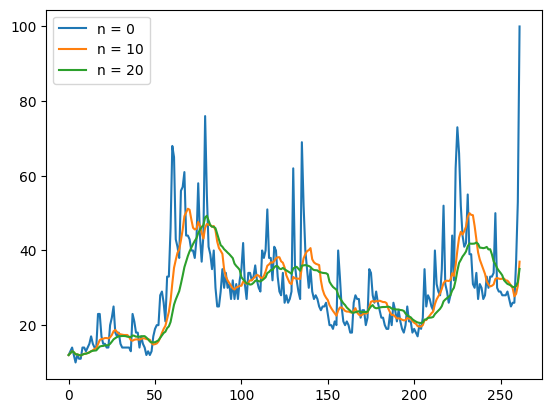

In [80]:
avg1 = a.SMA(['BTC'], 0)
avg2 = a.SMA(['BTC'], 10)
avg3 = a.SMA(['BTC'], 20)

plt.plot(range(avg1.shape[1]), avg1[0], range(avg2.shape[1]), avg2[0], range(avg3.shape[1]), avg3[0])
plt.legend(["n = 0", "n = 10", "n = 20"])
plt.show()


Вычисление дифференциала

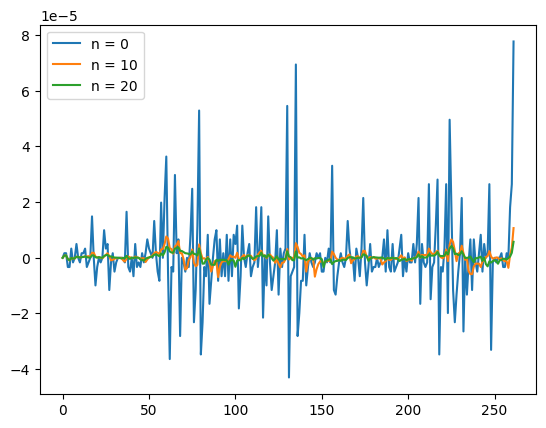

In [81]:
dif1 = a.diff(['BTC'], 0)
dif2 = a.diff(['BTC'], 10)
dif3 = a.diff(['BTC'], 20)


plt.plot(range(avg1.shape[1]), dif1[0], range(avg2.shape[1]), dif2[0], range(avg3.shape[1]), dif3[0])
plt.legend(["n = 0", "n = 10", "n = 20"])
plt.show()

Получение экстремумов

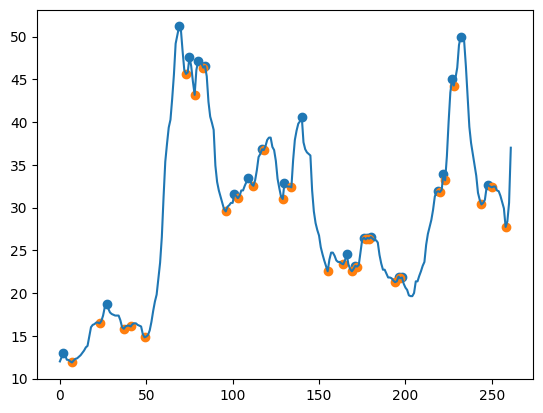

In [82]:
maxs = a.max_points(['BTC'], 10)
mins = a.min_points(['BTC'], 10)

plt.plot(avg2[0])
plt.scatter(maxs[0], avg2[0][maxs[0]])
plt.scatter(mins[0], avg2[0][mins[0]])
plt.show()


In [83]:
extermes = a.extreme_points(['BTC'], 0)

Получение автокорелляции

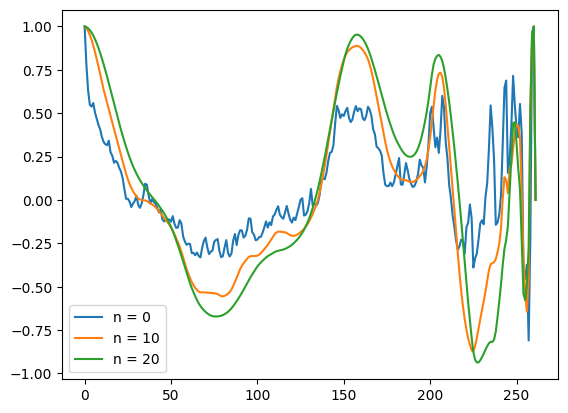

In [84]:
acf1 = a.ACF(['BTC'], 0)
acf2 = a.ACF(['BTC'], 10)
acf3 = a.ACF(['BTC'], 20)

plt.plot(range(avg1.shape[1]), acf1[0])
plt.plot(range(avg1.shape[1]), acf2[0])
plt.plot(range(avg1.shape[1]), acf3[0])
plt.legend(["n = 0", "n = 10", "n = 20"])
plt.show()


In [85]:
a.save_data_frame("output.xlsx")